# Estudio sobre la evolución de la polarización en España

Este documento estudia los datos recopilados del barómetro mensual  del CIS. Los datos recopilados se han escogido de todos los años de los que se tiene constancia aunque no se han recogido todas las variables posibles. Se han obtenido las variables correspondientes a las siguientes categorías:    

   * Información personal del individuo que responde (A)
   * Variables económicas (B)
   * Variables políticas (C)
   * Variables laborales (G)
   
Con estos cuatro campos se pretende hacer un estudio sobre la polarización política en la sociedad española. Formarán parte del estudio únicamente los años comprendidos en el periodo 2005-2020.

En primer lugar se estudiarán las variables políticas y después las económicas. Tras este estudio a gran escala se hará un acercamiento a los datos de Cataluña como caso de estudio particular.
    

Las variables disponibles y sus códigos correspondientes se pueden observar en la siguiente imagen:

![imagea](images/variable1.png)

![image2](images/variable2.png)

![image3](images/variable3.png)

In [1]:
# Para tratamiento de datos
import pandas as pd
import numpy as np

# Para gráficos
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Para fechas
import datetime

# Otros
import math

# Para claridad del código
import warnings
warnings.filterwarnings('ignore')

En primer lugar se importa la base de datos completa y se obtienen únicamente las entradas correspondientes al periodo de tiempo indicado.

In [2]:
#all_data = pd.read_excel('TablaDatos.xlsx', index_col = False)   #---- Para la primera vez
#all_data.to_pickle("./all_data.pkl") #----- Guardar como df para faster access
all_data = pd.read_pickle("./all_data.pkl")  #------ importar df de manera más rápida

In [3]:
# Cambiando este año se editan todos los límites temporales inferiores de los gráficos
ano_inicial = 2005
#ano_inicial = 2010

In [4]:
datos_interes = all_data[all_data["Año"]>=ano_inicial];

Una vez seleccionados los datos de interés se procederá en dos pasos. En primer lugar, se estudiarán los ámbitos político, económico y laboral de manera independiente. Una vez se haya obtenido una imagen general de las tendencias durante la última década se procederá a la segunda parte del estudio. En esta segunda parte se relacionarán los tres ámbitos. El objetivo es tratar de identificar algún patrón o tendencia que permita afirmar o identificar un posible incremento de polarización social y política.

## Fecha en formato correcto

Los distintos meses se pasarán a su número correspondiente

In [5]:
datos_interes['Mes'].unique()

array(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Juniot', 'Julio',
       'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], dtype=object)

In [6]:
mes_map = {
    'Enero':1,
    'Febrero':2,
    'Marzo':3,
    'Abril':4,
    'Mayo':5,
    'Juniot':6,
    'Julio': 7,
    'Septiembre': 9,
    'Octubre': 10,
    'Noviembre': 11,
    'Diciembre': 12
}

In [7]:
datos_interes['Mes'] = datos_interes['Mes'].map(mes_map)

In [8]:
datos_interes['Mes'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12], dtype=int64)

Se crea una nueva columna llamada fecha

In [9]:
anos = np.array(datos_interes['Año'])
meses = np.array(datos_interes['Mes'])
dia_uno = np.ones(( len(datos_interes['Mes']) ,), dtype="int64")

date=datos_interes.apply(lambda x: datetime.date(int(x['Año']), x['Mes'], 1),axis=1)
datos_interes['Fecha'] = pd.to_datetime(date)

## Estudio de la percepción política

Para esta primera aproximación se escogen únicamente las variabes

In [10]:
columnas_politicas = ["Fecha", "C.1.1", "C.1.2", "C.1.3", "C.2.1", "C.2.2", "C.3.1", "C.3.2.1", "C.3.2.2", "C.3.2.3", "C.3.2.4", "C.3.2.5", "C.3.2.6", "C.3.3", "C.3.4", "C.3.5"]

In [11]:
datos_politicos = datos_interes[columnas_politicas]

### Situación política actual y opinión a un año [C.1]

Las variables C.1.X representan la opinión de los ciudadanos respecto a la situación política:
* C.1.1 situación política actual
* C.1.2 situación política retrospectiva (1 año)
* C.1.3 situación política prospectiva (1 año)

Las posibles respuestas sobre la situación política actual son: 

In [12]:
print(datos_politicos["C.1.1"].unique())

['Mala' 'Buena' 'Regular' 'Muy mala' 'N.S.' 'N.C.' 'Muy buena' '-99.0' nan]


Las posibles respuestas sobre la reflexión del último año y las perspectivas de futuro son:

In [13]:
print(datos_politicos["C.1.2"].unique())
print(datos_politicos["C.1.3"].unique())

['Igual' 'N.S.' 'Peor' 'Mejor' 'N.C.' nan]
['Igual' 'Mejor' 'N.S.' 'Peor' 'N.C.' '-99.0' nan]


A continuación se muetran distintas gráficas temporales mostrando la evolución

#### Situación política actual

A cada una de las respuestas se le asigna el número correspondiente del 1 al 5. Las respuestas N.S y N.C no se tienen en cuenta en este caso.

In [14]:
C11_map = {
    'Muy buena':5,
    'Buena':4,
    'Regular':3,
    'Mala':2,
    'Muy mala':1,
}

datos_politicos['C.1.1'] = datos_politicos['C.1.1'].map(C11_map)

In [15]:
#datos_politicos[['Fecha','C.1.1']].groupby(['Fecha', 'C.1.1']).size().reset_index(name="NumRespuestas")

In [16]:
medias_sit_politica = datos_politicos[['Fecha','C.1.1']].groupby(['Fecha']).mean().reset_index()

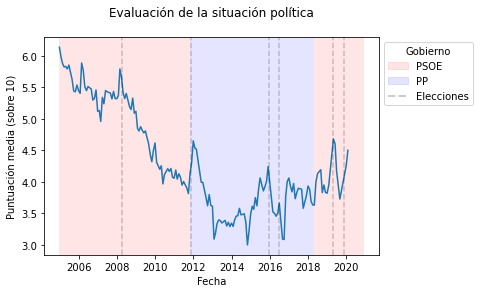

In [17]:
fig, ax = plt.subplots()
plt.plot(medias_sit_politica['Fecha'], medias_sit_politica['C.1.1']*2)
plt.ylabel('Puntuación media (sobre 10)')
plt.xlabel('Fecha')
plt.title("Evaluación de la situación política\n")

# Elecciones
plt.axvline(datetime.datetime(2008,4,9), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2011,11,20), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2015,12,20), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2016,6,26), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2019,4,28), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2019,11,10), color = 'black', alpha = 0.2, ls = "--")

# Los periodos de gobierno
plt.axvspan(datetime.datetime(ano_inicial,1,1), datetime.datetime(2011,11,1), facecolor='r', alpha=0.1)
plt.axvspan(datetime.datetime(2011,11,1), datetime.datetime(2018,5,1), facecolor='b', alpha=0.1)
plt.axvspan(datetime.datetime(2018,5,1), datetime.datetime(2020,12,1), facecolor='r', alpha=0.1)
legend_elements = [Patch(facecolor='r',alpha = 0.1, edgecolor='r',label='PSOE'),
                   Patch(facecolor='b',alpha = 0.1, edgecolor='b',label='PP'),
                  Line2D([0], [0], color='black', alpha = 0.2,ls = "--", lw=2, label='Elecciones')]
ax.legend(handles=legend_elements,  title = "Gobierno", bbox_to_anchor = (1,1))
plt.savefig("images/Polit_1-Percepcion-politica.png", bbox_inches='tight')
plt.show()

#### Situación política año pasado y siguiente

Siguiendo el mismo criterio que anteriormente, a cada respuesta se le asigna un número para poder agregarlas.

In [18]:
C1213_map = {
    'Mejor':5,
    'Igual':3,
    'Peor':1
}

datos_politicos['C.1.2'] = datos_politicos['C.1.2'].map(C1213_map)
datos_politicos['C.1.3'] = datos_politicos['C.1.3'].map(C1213_map)

In [19]:
medias_sit_politica_pasado = datos_politicos[['Fecha','C.1.2']].groupby(['Fecha']).mean().reset_index()
medias_sit_politica_siguiente = datos_politicos[['Fecha','C.1.3']].groupby(['Fecha']).mean().reset_index()

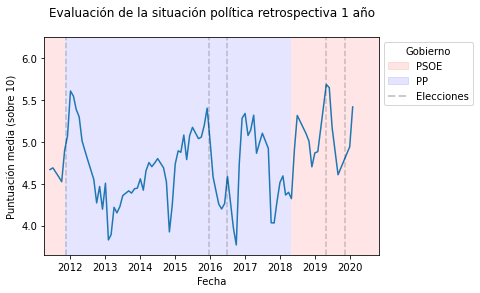

In [20]:
fig, ax = plt.subplots()
plt.plot(medias_sit_politica_pasado['Fecha'], medias_sit_politica_pasado['C.1.2']*2)
plt.ylabel('Puntuación media (sobre 10)')
plt.xlabel('Fecha')
plt.title("Evaluación de la situación política retrospectiva 1 año\n")

# Este comando se utiliza para dibujar solo las fechas para las que hay datos
plt.xlim(left = datetime.datetime(2011,4,1))

# Elecciones
plt.axvline(datetime.datetime(2008,4,9), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2011,11,20), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2015,12,20), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2016,6,26), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2019,4,28), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2019,11,10), color = 'black', alpha = 0.2, ls = "--")

# Periodos de gobierno
plt.axvspan(datetime.datetime(ano_inicial,1,1), datetime.datetime(2011,11,1), facecolor='r', alpha=0.1)
plt.axvspan(datetime.datetime(2011,11,1), datetime.datetime(2018,5,1), facecolor='b', alpha=0.1)
plt.axvspan(datetime.datetime(2018,5,1), datetime.datetime(2020,12,1), facecolor='r', alpha=0.1)
legend_elements = [Patch(facecolor='r',alpha = 0.1, edgecolor='r',label='PSOE'),
                   Patch(facecolor='b',alpha = 0.1, edgecolor='b',label='PP'),
                  Line2D([0], [0], color='black', alpha = 0.2,ls = "--", lw=2, label='Elecciones')]
ax.legend(handles=legend_elements,  title = "Gobierno", bbox_to_anchor = (1,1))
plt.savefig("images/Polit_2-Percepcion-politica-retrospectiva.png", bbox_inches='tight')
plt.show()


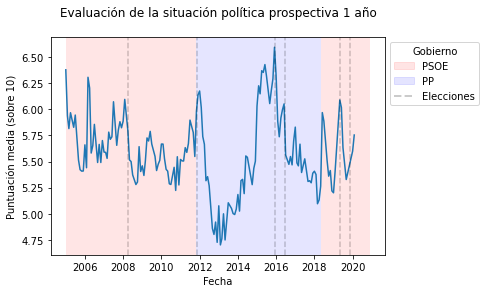

In [21]:
fig, ax = plt.subplots()
plt.plot(medias_sit_politica_siguiente['Fecha'], medias_sit_politica_siguiente['C.1.3']*2)
plt.ylabel('Puntuación media (sobre 10)')
plt.xlabel('Fecha')
plt.title("Evaluación de la situación política prospectiva 1 año\n")

#Elecciones
plt.axvline(datetime.datetime(2008,4,9), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2011,11,20), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2015,12,20), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2016,6,26), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2019,4,28), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2019,11,10), color = 'black', alpha = 0.2, ls = "--")

# Los periodos de gobierno
plt.axvspan(datetime.datetime(ano_inicial,1,1), datetime.datetime(2011,11,1), facecolor='r', alpha=0.1)
plt.axvspan(datetime.datetime(2011,11,1), datetime.datetime(2018,5,1), facecolor='b', alpha=0.1)
plt.axvspan(datetime.datetime(2018,5,1), datetime.datetime(2020,12,1), facecolor='r', alpha=0.1)
legend_elements = [Patch(facecolor='r',alpha = 0.1, edgecolor='r',label='PSOE'),
                   Patch(facecolor='b',alpha = 0.1, edgecolor='b',label='PP'),
                  Line2D([0], [0], color='black', alpha = 0.2,ls = "--", lw=2, label='Elecciones')]
ax.legend(handles=legend_elements,  title = "Gobierno", bbox_to_anchor = (1,1))
plt.savefig("images/Polit_3-Percepcion-politica-prospectiva.png", bbox_inches='tight')
plt.show()


#### Combinación de opiniones políticas

Se juntarán los tres gráficos anteriores en uno mismo para poder compararlos entre sí.

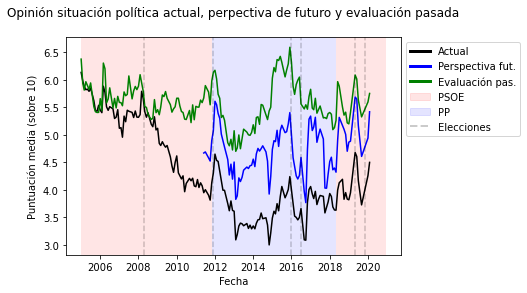

In [22]:
fig, ax = plt.subplots()
plt.plot(medias_sit_politica['Fecha'], medias_sit_politica['C.1.1']*2, color = "black")
plt.plot(medias_sit_politica_pasado['Fecha'], medias_sit_politica_pasado['C.1.2']*2, "blue")
plt.plot(medias_sit_politica_siguiente['Fecha'], medias_sit_politica_siguiente['C.1.3']*2, color = "green")
plt.ylabel('Puntuación media (sobre 10)')
plt.xlabel('Fecha')
plt.title("Opinión situación política actual, perpectiva de futuro y evaluación pasada\n")

#Elecciones
plt.axvline(datetime.datetime(2008,4,9), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2011,11,20), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2015,12,20), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2016,6,26), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2019,4,28), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2019,11,10), color = 'black', alpha = 0.2, ls = "--")

# Los periodos de gobierno
plt.axvspan(datetime.datetime(ano_inicial,1,1), datetime.datetime(2011,11,1), facecolor='r', alpha=0.1)
plt.axvspan(datetime.datetime(2011,11,1), datetime.datetime(2018,5,1), facecolor='b', alpha=0.1)
plt.axvspan(datetime.datetime(2018,5,1), datetime.datetime(2020,12,1), facecolor='r', alpha=0.1)
legend_elements = [ Line2D([0], [0], color='black', lw=3, label='Actual'),
                   Line2D([0], [0], color='blue', lw=3, label='Perspectiva fut.'),
                   Line2D([0], [0], color='green', lw=3, label='Evaluación pas.'),
                    Patch(facecolor='r',alpha = 0.1, edgecolor='r',label='PSOE'),
                   Patch(facecolor='b',alpha = 0.1, edgecolor='b',label='PP'),
                  Line2D([0], [0], color='black', alpha = 0.2,ls = "--", lw=2, label='Elecciones')]
ax.legend(handles=legend_elements, bbox_to_anchor = (1,1))
plt.savefig("images/Polit_4-Conjunto-opinion-politica.png", bbox_inches='tight')
plt.show()


### Preferencias políticas [C.2]

Las variables C.2.X representan la opinión de los ciudadanos respecto a distintos temas organizativos territoriales:
* C.2.1 preferencias de organización política estatal
* C.2.2 sentimiento de pertenencia 

Las posibles respuestas sobre la preferencia de organización política son:

In [23]:
print(datos_politicos["C.2.1"].unique())

[nan
 'Un Estado en el que las Comunidades Autónomas tengan mayor autonomía que en la actualidad'
 'Un Estado con Comunidades Autónomas como en la actualidad'
 'Un Estado con un único Gobierno Central sin autonomías'
 'Un Estado en el que las Comunidades Autónomas tengan menor autonomía que en la actualidad'
 'N.S.'
 'Un Estado en el que se reconociese a las Comunidades Autónomas la posibilidad de convertirse en estados independientes'
 'N.C.']


Las posibles respuestas sobre el sentimiento de pertenencia son:

In [24]:
print(datos_politicos["C.2.2"].unique())

[nan 'Se siente tan español/a como (gentilicio C.A.)'
 'Se siente más (gentilicio C.A.) que español/a'
 'Se siente únicamente español/a'
 'Se siente más español/a que (gentilicio C.A.)'
 '(NO LEER) Ninguna de las anteriores'
 'Se siente únicamente (gentilicio C.A.)' 'N.S.' 'N.C.' '-99.0']


#### Preferencia de organización política

In [25]:
C21_map = {
    'Un Estado con un único Gobierno Central sin autonomías':1,
    'Un Estado en el que las Comunidades Autónomas tengan menor autonomía que en la actualidad':2,
    'Un Estado con Comunidades Autónomas como en la actualidad':3,
    'Un Estado en el que las Comunidades Autónomas tengan mayor autonomía que en la actualidad':4,
    'Un Estado en el que se reconociese a las Comunidades Autónomas la posibilidad de convertirse en estados independientes':5,
}

datos_politicos['C.2.1'] = datos_politicos['C.2.1'].map(C21_map)

Se calcula el porcentaje del total que representa cada una de las respuestas y se muestra una comparación de todos ellos. Pueden no sumar 100% debido a que no se ha tenido en cuenta los NS y NC

In [26]:
count_por_fechas_y_respuesta = datos_politicos[['Fecha','C.2.1']].groupby(['Fecha', 'C.2.1']).size()
count_por_fechas = count_por_fechas_y_respuesta.groupby(['Fecha']).sum()
#count_por_fechas = datos_politicos[['Fecha']].groupby(['Fecha']).size()
porcentajes = (count_por_fechas_y_respuesta.div(count_por_fechas, level = "Fecha") * 100).reset_index(name = "Porcentaje")

In [27]:
porcentajes

,Fecha,C.2.1,Porcentaje
0,2010-01-01,1.0,13.504968
1,2010-01-01,2.0,16.034327
2,2010-01-01,3.0,45.302620
3,2010-01-01,4.0,16.982836
4,2010-01-01,5.0,8.175248
...,...,...,...
390,2020-02-01,1.0,19.156670
391,2020-02-01,2.0,13.086150
392,2020-02-01,3.0,45.510723
393,2020-02-01,4.0,12.213740


Se  generan distintas tablas para cada una de las series obtenidas con los porcentajes de las respuestas. Se representarán a continuación.

In [28]:
porcentajes_central = porcentajes[porcentajes["C.2.1"]==1]
porcentajes_mascentral = porcentajes[porcentajes["C.2.1"]==2]
porcentajes_igual = porcentajes[porcentajes["C.2.1"]==3]
porcentajes_menoscentral = porcentajes[porcentajes["C.2.1"]==4]
porcentajes_federal = porcentajes[porcentajes["C.2.1"]==5]

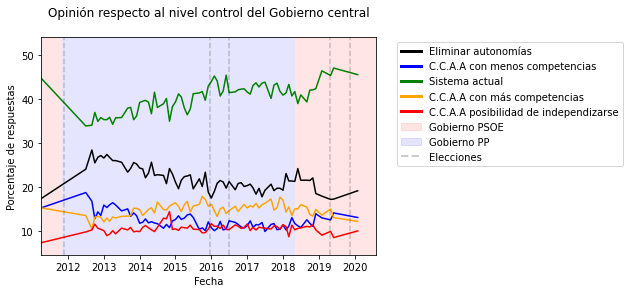

In [29]:
fig, ax = plt.subplots()
plt.plot(porcentajes_central['Fecha'], porcentajes_central['Porcentaje'], color = "black")
plt.plot(porcentajes_mascentral['Fecha'], porcentajes_mascentral['Porcentaje'], color = "b")
plt.plot(porcentajes_igual['Fecha'], porcentajes_igual['Porcentaje'], color = "green")
plt.plot(porcentajes_menoscentral['Fecha'], porcentajes_menoscentral['Porcentaje'], color = "orange")
plt.plot(porcentajes_federal['Fecha'], porcentajes_federal['Porcentaje'], color = "red")


plt.ylabel('Porcentaje de respuestas')
plt.xlabel('Fecha')
plt.title("Opinión respecto al nivel control del Gobierno central\n" )

# Este comando se utiliza para dibujar solo las fechas para las que hay datos
plt.xlim(left = datetime.datetime(2011,4,1))



#Elecciones
plt.axvline(datetime.datetime(2008,4,9), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2011,11,20), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2015,12,20), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2016,6,26), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2019,4,28), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2019,11,10), color = 'black', alpha = 0.2, ls = "--")

# Los periodos de gobierno
plt.axvspan(datetime.datetime(ano_inicial,1,1), datetime.datetime(2011,11,1), facecolor='r', alpha=0.1)
plt.axvspan(datetime.datetime(2011,11,1), datetime.datetime(2018,5,1), facecolor='b', alpha=0.1)
plt.axvspan(datetime.datetime(2018,5,1), datetime.datetime(2020,12,1), facecolor='r', alpha=0.1)
legend_elements = [Line2D([0], [0], color='black', lw=3, label='Eliminar autonomías'),
                   Line2D([0], [0], color='b', lw=3, label='C.C.A.A con menos competencias'),
                   Line2D([0], [0], color='green', lw=3, label='Sistema actual'),
                   Line2D([0], [0], color='orange', lw=3, label='C.C.A.A con más competencias'),
                   Line2D([0], [0], color='r', lw=3, label='C.C.A.A posibilidad de independizarse'),
                    Patch(facecolor='r',alpha = 0.1, edgecolor='r',label='Gobierno PSOE'),
                   Patch(facecolor='b',alpha = 0.1, edgecolor='b',label='Gobierno PP'),
                  Line2D([0], [0], color='black', alpha = 0.2,ls = "--", lw=2, label='Elecciones')]

ax.legend(handles=legend_elements, bbox_to_anchor = (1.05,1))


plt.savefig("images/Polit_5-Control-gobierno-España.png", bbox_inches='tight')
plt.show()


#### Sentimiento de pertenencia

Esta vez para facilitar el tratamiento se sustituye cada una de las respuestas relevantes por un código numérico. En este caso estos códigos no tienen ningún significado ni valor. Simplemente se hace para simplificar la referencia a cada respuesta.

In [30]:
C22_map = {
    'Se siente únicamente español/a':1,
    'Se siente más español/a que (gentilicio C.A.)':2,
    'Se siente tan español/a como (gentilicio C.A.)':3,
    'Se siente más (gentilicio C.A.) que español/a':4,
    'Se siente únicamente (gentilicio C.A.)':5,
}

datos_politicos['C.2.2'] = datos_politicos['C.2.2'].map(C22_map)

Se calcula el porcentaje del total que representa cada una de las respuestas y se muestra una comparación de todos ellos. Pueden no sumar 100% debido a que no se ha tenido en cuenta los NS y NC

In [31]:
count_por_fechas_y_respuesta = datos_politicos[['Fecha','C.2.2']].groupby(['Fecha', 'C.2.2']).size()
count_por_fechas = count_por_fechas_y_respuesta.groupby(['Fecha']).sum()
#count_por_fechas = datos_politicos[['Fecha']].groupby(['Fecha']).size()
porcentajes = (count_por_fechas_y_respuesta.div(count_por_fechas, level = "Fecha") * 100).reset_index(name = "Porcentaje")

In [32]:
porcentajes

,Fecha,C.2.2,Porcentaje
0,2012-11-01,1.0,17.823878
1,2012-11-01,2.0,6.943268
2,2012-11-01,3.0,57.493649
3,2012-11-01,4.0,11.430991
4,2012-11-01,5.0,6.308213
...,...,...,...
360,2020-02-01,1.0,16.624685
361,2020-02-01,2.0,5.937388
362,2020-02-01,3.0,60.165527
363,2020-02-01,4.0,11.442965


Se  generan distintas tablas para cada una de las series obtenidas con los porcentajes de las respuestas. Se representarán a continuación.

In [33]:
porcentajes_espanol = porcentajes[porcentajes["C.2.2"]==1]
porcentajes_masespanolque = porcentajes[porcentajes["C.2.2"]==2]
porcentajes_igualespanolque = porcentajes[porcentajes["C.2.2"]==3]
porcentajes_menosespanolque = porcentajes[porcentajes["C.2.2"]==4]
porcentajes_noespanol = porcentajes[porcentajes["C.2.2"]==5]

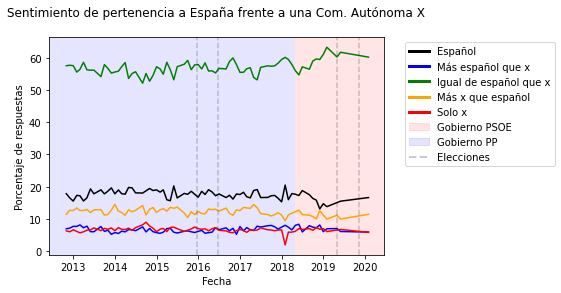

In [34]:
fig, ax = plt.subplots()
plt.plot(porcentajes_espanol['Fecha'], porcentajes_espanol['Porcentaje'], color = "black")
plt.plot(porcentajes_masespanolque['Fecha'], porcentajes_masespanolque['Porcentaje'], color = "b")
plt.plot(porcentajes_igualespanolque['Fecha'], porcentajes_igualespanolque['Porcentaje'], color = "green")
plt.plot(porcentajes_menosespanolque['Fecha'], porcentajes_menosespanolque['Porcentaje'], color = "orange")
plt.plot(porcentajes_noespanol['Fecha'], porcentajes_noespanol['Porcentaje'], color = "red")



plt.ylabel('Porcentaje de respuestas')
plt.xlabel('Fecha')
plt.title("Sentimiento de pertenencia a España frente a una Com. Autónoma X\n" )

# Este comando se utiliza para dibujar solo las fechas para las que hay datos
plt.xlim(left = datetime.datetime(2012,6,1))

#Elecciones
plt.axvline(datetime.datetime(2008,4,9), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2011,11,20), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2015,12,20), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2016,6,26), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2019,4,28), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2019,11,10), color = 'black', alpha = 0.2, ls = "--")

# Los periodos de gobierno
plt.axvspan(datetime.datetime(ano_inicial,1,1), datetime.datetime(2011,11,1), facecolor='r', alpha=0.1)
plt.axvspan(datetime.datetime(2011,11,1), datetime.datetime(2018,5,1), facecolor='b', alpha=0.1)
plt.axvspan(datetime.datetime(2018,5,1), datetime.datetime(2020,12,1), facecolor='r', alpha=0.1)
legend_elements = [Line2D([0], [0], color='black', lw=3, label='Español'),
                   Line2D([0], [0], color='b', lw=3, label='Más español que x'),
                   Line2D([0], [0], color='green', lw=3, label='Igual de español que x'),
                   Line2D([0], [0], color='orange', lw=3, label='Más x que español'),
                   Line2D([0], [0], color='r', lw=3, label='Solo x'),
                    Patch(facecolor='r',alpha = 0.1, edgecolor='r',label='Gobierno PSOE'),
                   Patch(facecolor='b',alpha = 0.1, edgecolor='b',label='Gobierno PP'),
                  Line2D([0], [0], color='black', alpha = 0.2,ls = "--", lw=2, label='Elecciones')]
ax.legend(handles=legend_elements, bbox_to_anchor = (1.05,1))


plt.savefig("images/Polit_6-Sentimiento-pertenencia-España.png", bbox_inches='tight')
plt.show()


### Escala ubicación ideológica [C.3.1]

Esta variable indica la colocación del ciudadano en una escala ideológica. Siendo en esta el 1 la posición más a la izquierda y 10 la más a la derecha.

Las posibles respuestas a esta escala son:

In [35]:
print(datos_politicos["C.3.1"].unique())

['6' '4' '3' '7' '5' '2' '8' 'N.S.' '10 Derecha' 'N.C.' '1 Izquierda' '9'
 '-99.0' nan]


#### Evolución general

Simplemente se muestra la media de las respuestas a lo largo del tiempo

In [36]:
C31_map = {
    '1 Izquierda':1,
    '2':2,
    '3':3,
    '4':4,
    '5':5,
    '6':6,
    '7':7,
    '8':8,
    '9':9,
    '10 Derecha':10,
}

datos_politicos['C.3.1'] = datos_politicos['C.3.1'].map(C31_map)

In [37]:
medias_ubic_ideologica = datos_politicos[['Fecha','C.3.1']].groupby(['Fecha']).mean().reset_index()

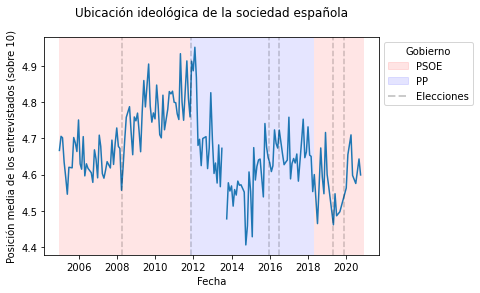

In [38]:
fig, ax = plt.subplots()
plt.plot(medias_ubic_ideologica['Fecha'], medias_ubic_ideologica['C.3.1'])
plt.ylabel('Posición media de los entrevistados (sobre 10)')
plt.xlabel('Fecha')
plt.title("Ubicación ideológica de la sociedad española\n")


#Elecciones
plt.axvline(datetime.datetime(2008,4,9), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2011,11,20), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2015,12,20), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2016,6,26), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2019,4,28), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2019,11,10), color = 'black', alpha = 0.2, ls = "--")


# Los periodos de gobierno
plt.axvspan(datetime.datetime(ano_inicial,1,1), datetime.datetime(2011,11,1), facecolor='r', alpha=0.1)
plt.axvspan(datetime.datetime(2011,11,1), datetime.datetime(2018,5,1), facecolor='b', alpha=0.1)
plt.axvspan(datetime.datetime(2018,5,1), datetime.datetime(2020,12,1), facecolor='r', alpha=0.1)
legend_elements = [Patch(facecolor='r',alpha = 0.1, edgecolor='r',label='PSOE'),
                   Patch(facecolor='b',alpha = 0.1, edgecolor='b',label='PP'),
                  Line2D([0], [0], color='black', alpha = 0.2,ls = "--", lw=2, label='Elecciones')]
ax.legend(handles=legend_elements,  title = "Gobierno", bbox_to_anchor = (1,1))
plt.savefig("images/Polit_7-Ubicación-ideológica.png", bbox_inches='tight')
plt.show()

#### Tendencia a los extremos

Se comparará la evolución del porcentaje de personas que se identifican con posiciones más extremas

In [39]:
count_por_fechas_y_respuesta = datos_politicos[['Fecha','C.3.1']].groupby(['Fecha', 'C.3.1']).size()
count_por_fechas = count_por_fechas_y_respuesta.groupby('Fecha').sum()
#count_por_fechas = datos_politicos[['Fecha']].groupby(['Fecha']).size()
porcentajes = (count_por_fechas_y_respuesta.div(count_por_fechas, level = "Fecha") * 100).reset_index(name = "Porcentaje")

In [40]:
porcentajes

,Fecha,C.3.1,Porcentaje
0,2005-01-01,1.0,2.434178
1,2005-01-01,2.0,5.315450
2,2005-01-01,3.0,18.479881
3,2005-01-01,4.0,19.473423
4,2005-01-01,5.0,26.875310
...,...,...,...
1655,2020-10-01,6.0,11.008468
1656,2020-10-01,7.0,7.390300
1657,2020-10-01,8.0,4.118553
1658,2020-10-01,9.0,1.270208


In [41]:
#porcentajes_extr_izq = porcentajes[porcentajes["C.3.1"]<2.5]  # 1 o 2
#porcentajes_izq = porcentajes[(porcentajes["C.3.1"]>2.5) & (porcentajes["C.3.1"]<4.5)] # 3 o 4
#porcentajes_centro = porcentajes[(porcentajes["C.3.1"]>4.5) & (porcentajes["C.3.1"]<6.5)] # 5 o 6
#porcentajes_dcha = porcentajes[(porcentajes["C.3.1"]>6.5) &  (porcentajes["C.3.1"]<8.5)] # 7 u 8
#porcentajes_extr_dcha = porcentajes[porcentajes["C.3.1"]> 8.5] # 9 u 10

In [42]:
porcentajes_extr_izq = porcentajes[porcentajes["C.3.1"]<2.5]  # 1 o 2
porcentajes_3 = porcentajes[porcentajes["C.3.1"]==3] 
porcentajes_4 = porcentajes[porcentajes["C.3.1"]==4] 
porcentajes_5 = porcentajes[porcentajes["C.3.1"]==5] 
porcentajes_6 = porcentajes[porcentajes["C.3.1"]==6] 
porcentajes_7 = porcentajes[porcentajes["C.3.1"]==7] 
porcentajes_8 = porcentajes[porcentajes["C.3.1"]==8] 
porcentajes_extr_dcha = porcentajes[porcentajes["C.3.1"]> 8.5] # 9 u 10

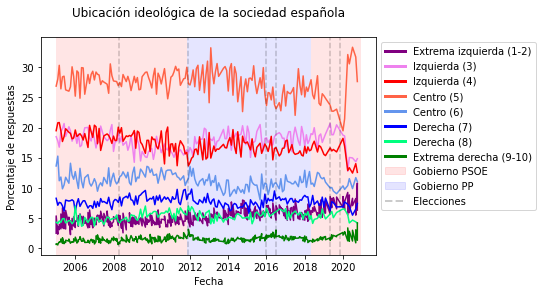

In [43]:
fig, ax = plt.subplots()
plt.plot(porcentajes_extr_izq['Fecha'], porcentajes_extr_izq['Porcentaje'], color = "purple")
plt.plot(porcentajes_3['Fecha'], porcentajes_3['Porcentaje'], color = "violet")
plt.plot(porcentajes_4['Fecha'], porcentajes_4['Porcentaje'], color = "red")
plt.plot(porcentajes_5['Fecha'], porcentajes_5['Porcentaje'], color = "tomato")
plt.plot(porcentajes_6['Fecha'], porcentajes_6['Porcentaje'], color = "cornflowerblue")
plt.plot(porcentajes_7['Fecha'], porcentajes_7['Porcentaje'], color = "blue")
plt.plot(porcentajes_8['Fecha'], porcentajes_8['Porcentaje'], color = "springgreen")
plt.plot(porcentajes_extr_dcha['Fecha'], porcentajes_extr_dcha['Porcentaje'], color = "green")



plt.ylabel('Porcentaje de respuestas')
plt.xlabel('Fecha')
plt.title("Ubicación ideológica de la sociedad española\n" )


#Elecciones
plt.axvline(datetime.datetime(2008,4,9), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2011,11,20), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2015,12,20), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2016,6,26), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2019,4,28), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2019,11,10), color = 'black', alpha = 0.2, ls = "--")


# Los periodos de gobierno
plt.axvspan(datetime.datetime(ano_inicial,1,1), datetime.datetime(2011,11,1), facecolor='r', alpha=0.1)
plt.axvspan(datetime.datetime(2011,11,1), datetime.datetime(2018,5,1), facecolor='b', alpha=0.1)
plt.axvspan(datetime.datetime(2018,5,1), datetime.datetime(2020,12,1), facecolor='r', alpha=0.1)
legend_elements = [Line2D([0], [0], color='purple', lw=3, label='Extrema izquierda (1-2)'),
                   Line2D([0], [0], color='violet', lw=3, label='Izquierda (3)'),
                   Line2D([0], [0], color='red', lw=3, label='Izquierda (4)'),
                   Line2D([0], [0], color='tomato', lw=3, label='Centro (5)'),
                   Line2D([0], [0], color='cornflowerblue', lw=3, label='Centro (6)'),
                   Line2D([0], [0], color='blue', lw=3, label='Derecha (7)'),
                   Line2D([0], [0], color='springgreen', lw=3, label='Derecha (8)'),
                   Line2D([0], [0], color='green', lw=3, label='Extrema derecha (9-10)'),
                    Patch(facecolor='r',alpha = 0.1, edgecolor='r',label='Gobierno PSOE'),
                   Patch(facecolor='b',alpha = 0.1, edgecolor='b',label='Gobierno PP'),
                  Line2D([0], [0], color='black', alpha = 0.2,ls = "--", lw=2, label='Elecciones')]
ax.legend(handles=legend_elements, bbox_to_anchor = (1,1))


plt.savefig("images/Polit_8-Ubicacion-ideologica-label.png", bbox_inches='tight')
plt.show()


Se separan los porcentajes con límites arbitrarios

In [44]:
porcentajes_extr_izq = porcentajes[porcentajes["C.3.1"]<3.5]  
porcentajes_centro = porcentajes[(porcentajes["C.3.1"]>3.5) & (porcentajes["C.3.1"]<6.5)]
porcentajes_extr_dcha = porcentajes[porcentajes["C.3.1"]> 6.5] 

Se agrupan por fechas sumando los componentes de cada uno

In [45]:
porcentajes_extr_izq_total = porcentajes_extr_izq.groupby('Fecha')['Porcentaje'].sum()
porcentajes_centro_total = porcentajes_centro.groupby('Fecha')['Porcentaje'].sum()
porcentajes_extr_dcha_total = porcentajes_extr_dcha.groupby('Fecha')['Porcentaje'].sum()

Estos resultados son ahora `pd.Series`, no `pd.Dataframes`. Se transformarán en tablas para poder representarse.

In [46]:
def seriesToDf(series):
    df = pd.Series.to_frame(series)
    df['Fecha'] = list(df.index)
    return df

In [47]:
porcentajes_extr_izq_total = seriesToDf(porcentajes_extr_izq_total)
porcentajes_centro_total = seriesToDf(porcentajes_centro_total)
porcentajes_extr_dcha_total = seriesToDf(porcentajes_extr_dcha_total)

A continuación se representan

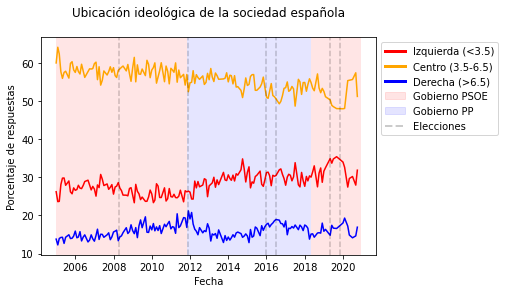

In [48]:
fig, ax = plt.subplots()
plt.plot(porcentajes_extr_izq_total['Fecha'], porcentajes_extr_izq_total['Porcentaje'], color = "red")
plt.plot(porcentajes_centro_total['Fecha'], porcentajes_centro_total['Porcentaje'], color = "orange")
plt.plot(porcentajes_extr_dcha_total['Fecha'], porcentajes_extr_dcha_total['Porcentaje'], color = "blue")


plt.ylabel('Porcentaje de respuestas')
plt.xlabel('Fecha')
plt.title("Ubicación ideológica de la sociedad española\n" )


#Elecciones
plt.axvline(datetime.datetime(2008,4,9), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2011,11,20), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2015,12,20), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2016,6,26), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2019,4,28), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2019,11,10), color = 'black', alpha = 0.2, ls = "--")


# Los periodos de gobierno
plt.axvspan(datetime.datetime(ano_inicial,1,1), datetime.datetime(2011,11,1), facecolor='r', alpha=0.1)
plt.axvspan(datetime.datetime(2011,11,1), datetime.datetime(2018,5,1), facecolor='b', alpha=0.1)
plt.axvspan(datetime.datetime(2018,5,1), datetime.datetime(2020,12,1), facecolor='r', alpha=0.1)
legend_elements = [Line2D([0], [0], color='red', lw=3, label='Izquierda (<3.5)'),
                   Line2D([0], [0], color='orange', lw=3, label='Centro (3.5-6.5)'),
                   Line2D([0], [0], color='blue', lw=3, label='Derecha (>6.5)'),
                    Patch(facecolor='r',alpha = 0.1, edgecolor='r',label='Gobierno PSOE'),
                   Patch(facecolor='b',alpha = 0.1, edgecolor='b',label='Gobierno PP'),
                  Line2D([0], [0], color='black', alpha = 0.2,ls = "--", lw=2, label='Elecciones')]
ax.legend(handles=legend_elements, bbox_to_anchor = (1,1))


plt.savefig("images/Polit_8.1-Ubicacion-ideologica-agregada.png", bbox_inches='tight')
plt.show()


Se prueba una nueva distribución de categorías

In [49]:
porcentajes_1_2_3 = porcentajes[porcentajes["C.3.1"]<3.5]  
porcentajes_4 = porcentajes[(porcentajes["C.3.1"]==4)]
porcentajes_5 = porcentajes[(porcentajes["C.3.1"]==5)]
porcentajes_6 = porcentajes[(porcentajes["C.3.1"]==6)]
porcentajes_7 = porcentajes[(porcentajes["C.3.1"]==7)]
porcentajes_8_9_10 = porcentajes[porcentajes["C.3.1"]> 7.5] 

Se agrupan por fechas sumando los componentes de cada uno

In [50]:
porcentajes_1_2_3_total = porcentajes_1_2_3.groupby('Fecha')['Porcentaje'].sum()
porcentajes_8_9_10_total = porcentajes_8_9_10.groupby('Fecha')['Porcentaje'].sum()

Estos resultados son ahora `pd.Series`, no `pd.Dataframes`. Se transformarán en tablas para poder representarse.

In [51]:
def seriesToDf(series):
    df = pd.Series.to_frame(series)
    df['Fecha'] = list(df.index)
    return df

porcentajes_1_2_3_total = seriesToDf(porcentajes_1_2_3_total)
porcentajes_8_9_10_total = seriesToDf(porcentajes_8_9_10_total)

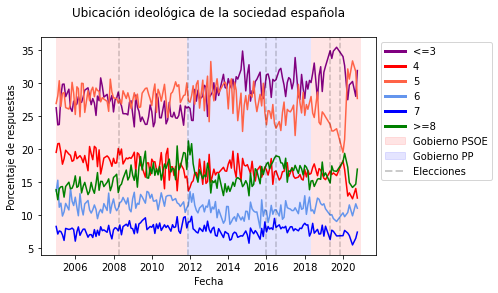

In [52]:
fig, ax = plt.subplots()
plt.plot(porcentajes_1_2_3_total['Fecha'], porcentajes_extr_izq_total['Porcentaje'], color = "purple")
plt.plot(porcentajes_4['Fecha'], porcentajes_4['Porcentaje'], color = "red")
plt.plot(porcentajes_5['Fecha'], porcentajes_5['Porcentaje'], color = "tomato")
plt.plot(porcentajes_6['Fecha'], porcentajes_6['Porcentaje'], color = "cornflowerblue")
plt.plot(porcentajes_7['Fecha'], porcentajes_7['Porcentaje'], color = "blue")
plt.plot(porcentajes_8_9_10_total['Fecha'], porcentajes_extr_dcha_total['Porcentaje'], color = "green")


plt.ylabel('Porcentaje de respuestas')
plt.xlabel('Fecha')
plt.title("Ubicación ideológica de la sociedad española\n" )


#Elecciones
plt.axvline(datetime.datetime(2008,4,9), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2011,11,20), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2015,12,20), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2016,6,26), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2019,4,28), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2019,11,10), color = 'black', alpha = 0.2, ls = "--")


# Los periodos de gobierno
plt.axvspan(datetime.datetime(ano_inicial,1,1), datetime.datetime(2011,11,1), facecolor='r', alpha=0.1)
plt.axvspan(datetime.datetime(2011,11,1), datetime.datetime(2018,5,1), facecolor='b', alpha=0.1)
plt.axvspan(datetime.datetime(2018,5,1), datetime.datetime(2020,12,1), facecolor='r', alpha=0.1)
legend_elements = [Line2D([0], [0], color='purple', lw=3, label='<=3'),
                   Line2D([0], [0], color='red', lw=3, label='4'),
                   Line2D([0], [0], color='tomato', lw=3, label='5'),
                   Line2D([0], [0], color='cornflowerblue', lw=3, label='6'),
                   Line2D([0], [0], color='blue', lw=3, label='7'),                   
                   Line2D([0], [0], color='green', lw=3, label='>=8'),
                    Patch(facecolor='r',alpha = 0.1, edgecolor='r',label='Gobierno PSOE'),
                   Patch(facecolor='b',alpha = 0.1, edgecolor='b',label='Gobierno PP'),
                  Line2D([0], [0], color='black', alpha = 0.2,ls = "--", lw=2, label='Elecciones')]
ax.legend(handles=legend_elements, bbox_to_anchor = (1,1))


plt.savefig("images/Polit_8.2-Ubicacion-ideologica-agregada.png", bbox_inches='tight')
plt.show()


In [53]:
#porcentajes_extr_izq = porcentajes[porcentajes["C.3.1"]<2.5]  # 1 o 2
#porcentajes_izq = porcentajes[(porcentajes["C.3.1"]>2.5) & (porcentajes["C.3.1"]<4.5)] # 3 o 4
#porcentajes_centro = porcentajes[(porcentajes["C.3.1"]>4.5) & (porcentajes["C.3.1"]<6.5)] # 5 o 6
#porcentajes_dcha = porcentajes[(porcentajes["C.3.1"]>6.5) &  (porcentajes["C.3.1"]<8.5)] # 7 u 8
#porcentajes_extr_dcha = porcentajes[porcentajes["C.3.1"]> 8.5] # 9 u 10

### Valoración gobierno/oposición [C.3.3-4]

Las variables C.3.X representan la opinión de los ciudadanos respecto a la situación política:
* C.3.3 valoración gestión gobierno
* C.3.4 valoración gestión oposición


Las posibles respuestas sobre valoración de gestión del gobierno y oposición son:

In [54]:
print(datos_politicos["C.3.3"].unique())

['Regular' 'Buena' 'Mala' 'N.S.' 'Muy buena' 'Muy mala' 'N.C.' nan]


In [55]:
C3334_map = {
    'Muy buena':5,
    'Buena':4,
    'Regular':3,
    'Mala':2,
    'Muy mala':1,
}

datos_politicos['C.3.3'] = datos_politicos['C.3.3'].map(C3334_map)
datos_politicos['C.3.4'] = datos_politicos['C.3.4'].map(C3334_map)

In [56]:
datos_politicos_copia = datos_politicos[(datos_politicos['C.3.3'].notna()) & (datos_politicos['C.3.4'].notna())]

In [57]:
medias_gestion_gobierno = datos_politicos_copia[['Fecha','C.3.3']].groupby(['Fecha']).mean().reset_index()
medias_gestion_oposicion = datos_politicos_copia[['Fecha','C.3.4']].groupby(['Fecha']).mean().reset_index()

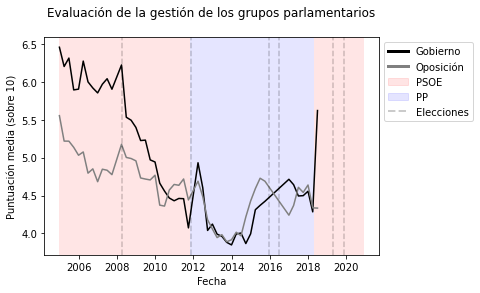

In [58]:
fig, ax = plt.subplots()
plt.plot(medias_gestion_gobierno['Fecha'], medias_gestion_gobierno['C.3.3']*2, color = "black")
plt.plot(medias_gestion_oposicion['Fecha'], medias_gestion_oposicion['C.3.4']*2, color = "grey")
plt.ylabel('Puntuación media (sobre 10)')
plt.xlabel('Fecha')
plt.title("Evaluación de la gestión de los grupos parlamentarios\n")

#Elecciones
plt.axvline(datetime.datetime(2008,4,9), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2011,11,20), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2015,12,20), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2016,6,26), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2019,4,28), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2019,11,10), color = 'black', alpha = 0.2, ls = "--")

# Los periodos de gobierno
plt.axvspan(datetime.datetime(ano_inicial,1,1), datetime.datetime(2011,11,1), facecolor='r', alpha=0.1)
plt.axvspan(datetime.datetime(2011,11,1), datetime.datetime(2018,5,1), facecolor='b', alpha=0.1)
plt.axvspan(datetime.datetime(2018,5,1), datetime.datetime(2020,12,1), facecolor='r', alpha=0.1)
legend_elements = [ Line2D([0], [0], color='black', lw=3, label='Gobierno'),
                   Line2D([0], [0], color='grey', lw=3, label='Oposición'),
                    Patch(facecolor='r',alpha = 0.1, edgecolor='r',label='PSOE'),
                   Patch(facecolor='b',alpha = 0.1, edgecolor='b',label='PP'),
                  Line2D([0], [0], color='black', alpha = 0.2,ls = "--", lw=2, label='Elecciones')]
ax.legend(handles=legend_elements, bbox_to_anchor = (1,1))
plt.savefig("images/Polit_9-Evaluación-gestion-parlamentaria.png", bbox_inches='tight')
plt.show()


(No hay datos desde que el PSOE accede al Gobierno en 2018)

### Participación elecciones [C.3.3]

No tiene mucho sentido estudiar este fenómeno. Esto se debe a que la mayoría de las entradas en la tabla no tienen muchas respuestas. Esto se muestra a continuación:

Hay 16 variables de interés en datos políticos

In [59]:
datos_politicos.shape

(428300, 16)

Para cada persona, la media de preguntas no respondidas es 8.18 (algo más del 50%)

In [60]:
np.mean(datos_politicos.isnull().sum(axis=1).tolist())

9.544711650712118

Un ejemplo aleatorio:

In [61]:
datos_politicos.iloc[290000,]

Fecha      2015-07-01 00:00:00
C.1.1                        1
C.1.2                        3
C.1.3                        3
C.2.1                        1
C.2.2                        3
C.3.1                        5
C.3.2.1                    NaN
C.3.2.2      Prefirió no votar
C.3.2.3                    NaN
C.3.2.4                    NaN
C.3.2.5                    NaN
C.3.2.6                    NaN
C.3.3                        3
C.3.4                        3
C.3.5                      NaN
Name: 638927, dtype: object

Por lo tanto, se procederá al estudio de la situación económica

## Estudio de la percepción económica

La percepción económica corresponde a las variables indicadas en la categoría B

In [62]:
columnas_economicas = ["Fecha", "B.1.1.1", "B.1.1.2", "B.1.2", "B.1.3", "B.2.1.1", "B.2.1.2", "B.2.2", "B.2.3"]

In [63]:
datos_economicos = datos_interes[columnas_economicas]

### Situación económica España

### Situación económica actual y opinión a un año [B.1]

Las variables B.1.X representan la opinión de los ciudadanos respecto a la situación económica:
* B.1.1.1 situación económica actual (opción regular) (?)
* B.1.1.2 situación económica actual
* B.1.2 situación económica retrospectiva (1 año)
* B.1.3 situación política prospectiva (1 año)

Las posibles respuestas sobre la situación política actual son: 

In [64]:
print(datos_economicos["B.1.1.1"].unique())
print(datos_economicos["B.1.1.2"].unique())

['Buena' 'Regular' 'Mala' 'Muy mala' 'Muy buena' 'N.S.' 'N.C.' '-99.0' nan]
[nan '(NO LEER) Regular' 'Mala' 'Muy mala' 'Buena' 'N.S.' 'Muy buena'
 'N.C.']


Las posibles respuestas sobre la reflexión del último año y las perspectivas de futuro son:

In [65]:
print(datos_economicos["B.1.2"].unique())
print(datos_economicos["B.1.3"].unique())

['Igual' 'N.S.' 'Peor' 'Mejor' 'N.C.' nan]
['Igual' 'Mejor' 'N.S.' 'Peor' 'N.C.' '-99.0' nan]


#### Situación económica actual

A cada una de las respuestas se le asigna el número correspondiente del 1 al 5. Las respuestas N.S y N.C no se tienen en cuenta en este caso.

In [66]:
B111_map = {
    'Muy buena':5,
    'Buena':4,
    'Regular':3,
    'Mala':2,
    'Muy mala':1,
}

datos_economicos['B.1.1.1'] = datos_economicos['B.1.1.1'].map(B111_map)

In [67]:
#datos_economicos[['Fecha','B.1.1.1']].groupby(['Fecha', 'B.1.1.1']).size().reset_index(name="NumRespuestas")

In [68]:
medias_sit_economica = datos_economicos[['Fecha','B.1.1.1']].groupby(['Fecha']).mean().reset_index()

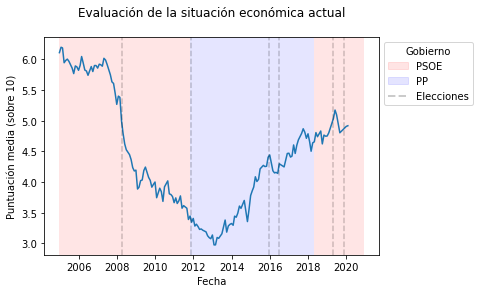

In [69]:
fig, ax = plt.subplots()
plt.plot(medias_sit_economica['Fecha'], medias_sit_economica['B.1.1.1']*2)
plt.ylabel('Puntuación media (sobre 10)')
plt.xlabel('Fecha')
plt.title("Evaluación de la situación económica actual\n")

#Elecciones
plt.axvline(datetime.datetime(2008,4,9), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2011,11,20), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2015,12,20), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2016,6,26), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2019,4,28), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2019,11,10), color = 'black', alpha = 0.2, ls = "--")

# Los periodos de gobierno
plt.axvspan(datetime.datetime(ano_inicial,1,1), datetime.datetime(2011,11,1), facecolor='r', alpha=0.1)
plt.axvspan(datetime.datetime(2011,11,1), datetime.datetime(2018,5,1), facecolor='b', alpha=0.1)
plt.axvspan(datetime.datetime(2018,5,1), datetime.datetime(2020,12,1), facecolor='r', alpha=0.1)
legend_elements = [Patch(facecolor='r',alpha = 0.1, edgecolor='r',label='PSOE'),
                   Patch(facecolor='b',alpha = 0.1, edgecolor='b',label='PP'),
                  Line2D([0], [0], color='black', alpha = 0.2,ls = "--", lw=2, label='Elecciones')]
ax.legend(handles=legend_elements,  title = "Gobierno", bbox_to_anchor = (1,1))
plt.savefig("images/Econ_1-Percepcion-economica.png", bbox_inches='tight')
plt.show()


#### Situación económica año pasado y siguiente

Siguiendo el mismo criterio que anteriormente, a cada respuesta se le asigna un número para poder agregarlas.

In [70]:
B1213_map = {
    'Mejor':5,
    'Igual':3,
    'Peor':1
}

datos_economicos['B.1.2'] = datos_economicos['B.1.2'].map(B1213_map)
datos_economicos['B.1.3'] = datos_economicos['B.1.3'].map(B1213_map)

In [71]:
medias_sit_economica_pasado = datos_economicos[['Fecha','B.1.2']].groupby(['Fecha']).mean().reset_index()
medias_sit_economica_siguiente = datos_economicos[['Fecha','B.1.3']].groupby(['Fecha']).mean().reset_index()

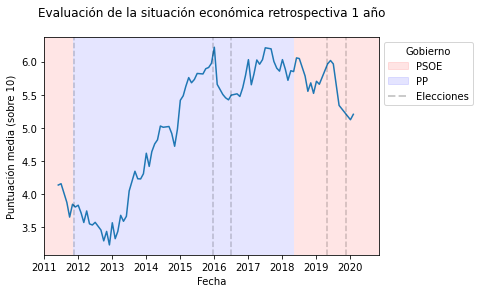

In [72]:
fig, ax = plt.subplots()
plt.plot(medias_sit_economica_pasado['Fecha'], medias_sit_economica_pasado['B.1.2']*2)
plt.ylabel('Puntuación media (sobre 10)')
plt.xlabel('Fecha')
plt.title("Evaluación de la situación económica retrospectiva 1 año\n")

# Este comando se utiliza para dibujar solo las fechas para las que hay datos
plt.xlim(left = datetime.datetime(2011,1,1))

#Elecciones
plt.axvline(datetime.datetime(2008,4,9), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2011,11,20), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2015,12,20), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2016,6,26), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2019,4,28), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2019,11,10), color = 'black', alpha = 0.2, ls = "--")

# Los periodos de gobierno
plt.axvspan(datetime.datetime(ano_inicial,1,1), datetime.datetime(2011,11,1), facecolor='r', alpha=0.1)
plt.axvspan(datetime.datetime(2011,11,1), datetime.datetime(2018,5,1), facecolor='b', alpha=0.1)
plt.axvspan(datetime.datetime(2018,5,1), datetime.datetime(2020,12,1), facecolor='r', alpha=0.1)
legend_elements = [Patch(facecolor='r',alpha = 0.1, edgecolor='r',label='PSOE'),
                   Patch(facecolor='b',alpha = 0.1, edgecolor='b',label='PP'),
                  Line2D([0], [0], color='black', alpha = 0.2,ls = "--", lw=2, label='Elecciones')]
ax.legend(handles=legend_elements,  title = "Gobierno", bbox_to_anchor = (1,1))
plt.savefig("images/Econ_2-Percepcion-economica-retrospectiva.png", bbox_inches='tight')
plt.show()


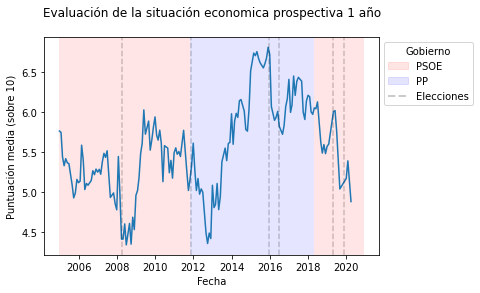

In [73]:
fig, ax = plt.subplots()
plt.plot(medias_sit_economica_siguiente['Fecha'], medias_sit_economica_siguiente['B.1.3']*2)
plt.ylabel('Puntuación media (sobre 10)')
plt.xlabel('Fecha')
plt.title("Evaluación de la situación economica prospectiva 1 año\n")

#Elecciones
plt.axvline(datetime.datetime(2008,4,9), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2011,11,20), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2015,12,20), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2016,6,26), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2019,4,28), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2019,11,10), color = 'black', alpha = 0.2, ls = "--")


# Los periodos de gobierno
plt.axvspan(datetime.datetime(ano_inicial,1,1), datetime.datetime(2011,11,1), facecolor='r', alpha=0.1)
plt.axvspan(datetime.datetime(2011,11,1), datetime.datetime(2018,5,1), facecolor='b', alpha=0.1)
plt.axvspan(datetime.datetime(2018,5,1), datetime.datetime(2020,12,1), facecolor='r', alpha=0.1)
legend_elements = [Patch(facecolor='r',alpha = 0.1, edgecolor='r',label='PSOE'),
                   Patch(facecolor='b',alpha = 0.1, edgecolor='b',label='PP'),
                  Line2D([0], [0], color='black', alpha = 0.2,ls = "--", lw=2, label='Elecciones')]
ax.legend(handles=legend_elements,  title = "Gobierno", bbox_to_anchor = (1,1))
plt.savefig("images/Econ_3-Percepcion-economica-prospectiva.png", bbox_inches='tight')
plt.show()


Se juntarán las tres series anteriores para comparar las opiniones de los españoles de manera conjunta

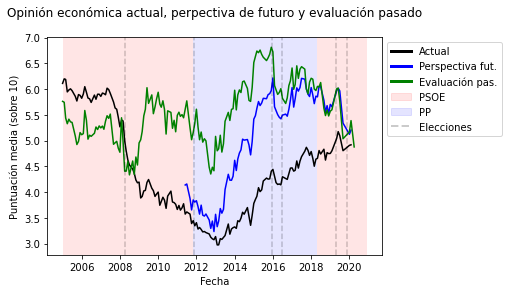

In [74]:
fig, ax = plt.subplots()
plt.plot(medias_sit_economica['Fecha'], medias_sit_economica['B.1.1.1']*2, color = "black")
plt.plot(medias_sit_economica_pasado['Fecha'], medias_sit_economica_pasado['B.1.2']*2, "blue")
plt.plot(medias_sit_economica_siguiente['Fecha'], medias_sit_economica_siguiente['B.1.3']*2, color = "green")
plt.ylabel('Puntuación media (sobre 10)')
plt.xlabel('Fecha')
plt.title("Opinión económica actual, perpectiva de futuro y evaluación pasado\n")

#Elecciones
plt.axvline(datetime.datetime(2008,4,9), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2011,11,20), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2015,12,20), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2016,6,26), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2019,4,28), color = 'black', alpha = 0.2, ls = "--")
plt.axvline(datetime.datetime(2019,11,10), color = 'black', alpha = 0.2, ls = "--")

# Los periodos de gobierno
plt.axvspan(datetime.datetime(ano_inicial,1,1), datetime.datetime(2011,11,1), facecolor='r', alpha=0.1)
plt.axvspan(datetime.datetime(2011,11,1), datetime.datetime(2018,5,1), facecolor='b', alpha=0.1)
plt.axvspan(datetime.datetime(2018,5,1), datetime.datetime(2020,12,1), facecolor='r', alpha=0.1)
legend_elements = [ Line2D([0], [0], color='black', lw=3, label='Actual'),
                   Line2D([0], [0], color='blue', lw=3, label='Perspectiva fut.'),
                   Line2D([0], [0], color='green', lw=3, label='Evaluación pas.'),
                    Patch(facecolor='r',alpha = 0.1, edgecolor='r',label='PSOE'),
                   Patch(facecolor='b',alpha = 0.1, edgecolor='b',label='PP'),
                  Line2D([0], [0], color='black', alpha = 0.2,ls = "--", lw=2, label='Elecciones')]
ax.legend(handles=legend_elements, bbox_to_anchor = (1,1))
plt.savefig("images/Econ_4-Conjunto-opinion-economica.png", bbox_inches='tight')
plt.show()


## Estudio particular Cataluña